<a href="https://colab.research.google.com/github/aakash0812/ConsumerAnalytics/blob/main/Trial__Consumer_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_excel('Alibaba-network.xlsx', index_col=0)
print(df)

     1    2    3    4    5    6    7    8    9    10   ...  518  519  520  \
1      0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
523    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
524    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
525    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
526    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
527    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     521  522  523  524  525  526  527  
1      0    0    0    0    0    0 

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
G = nx.DiGraph()

In [ ]:
for col in df.columns:
  G.add_node(col)

In [ ]:
for row in df.index:
  for col in df.columns:
    if df.loc[row,col] ==1:
      G.add_edge(row,col)

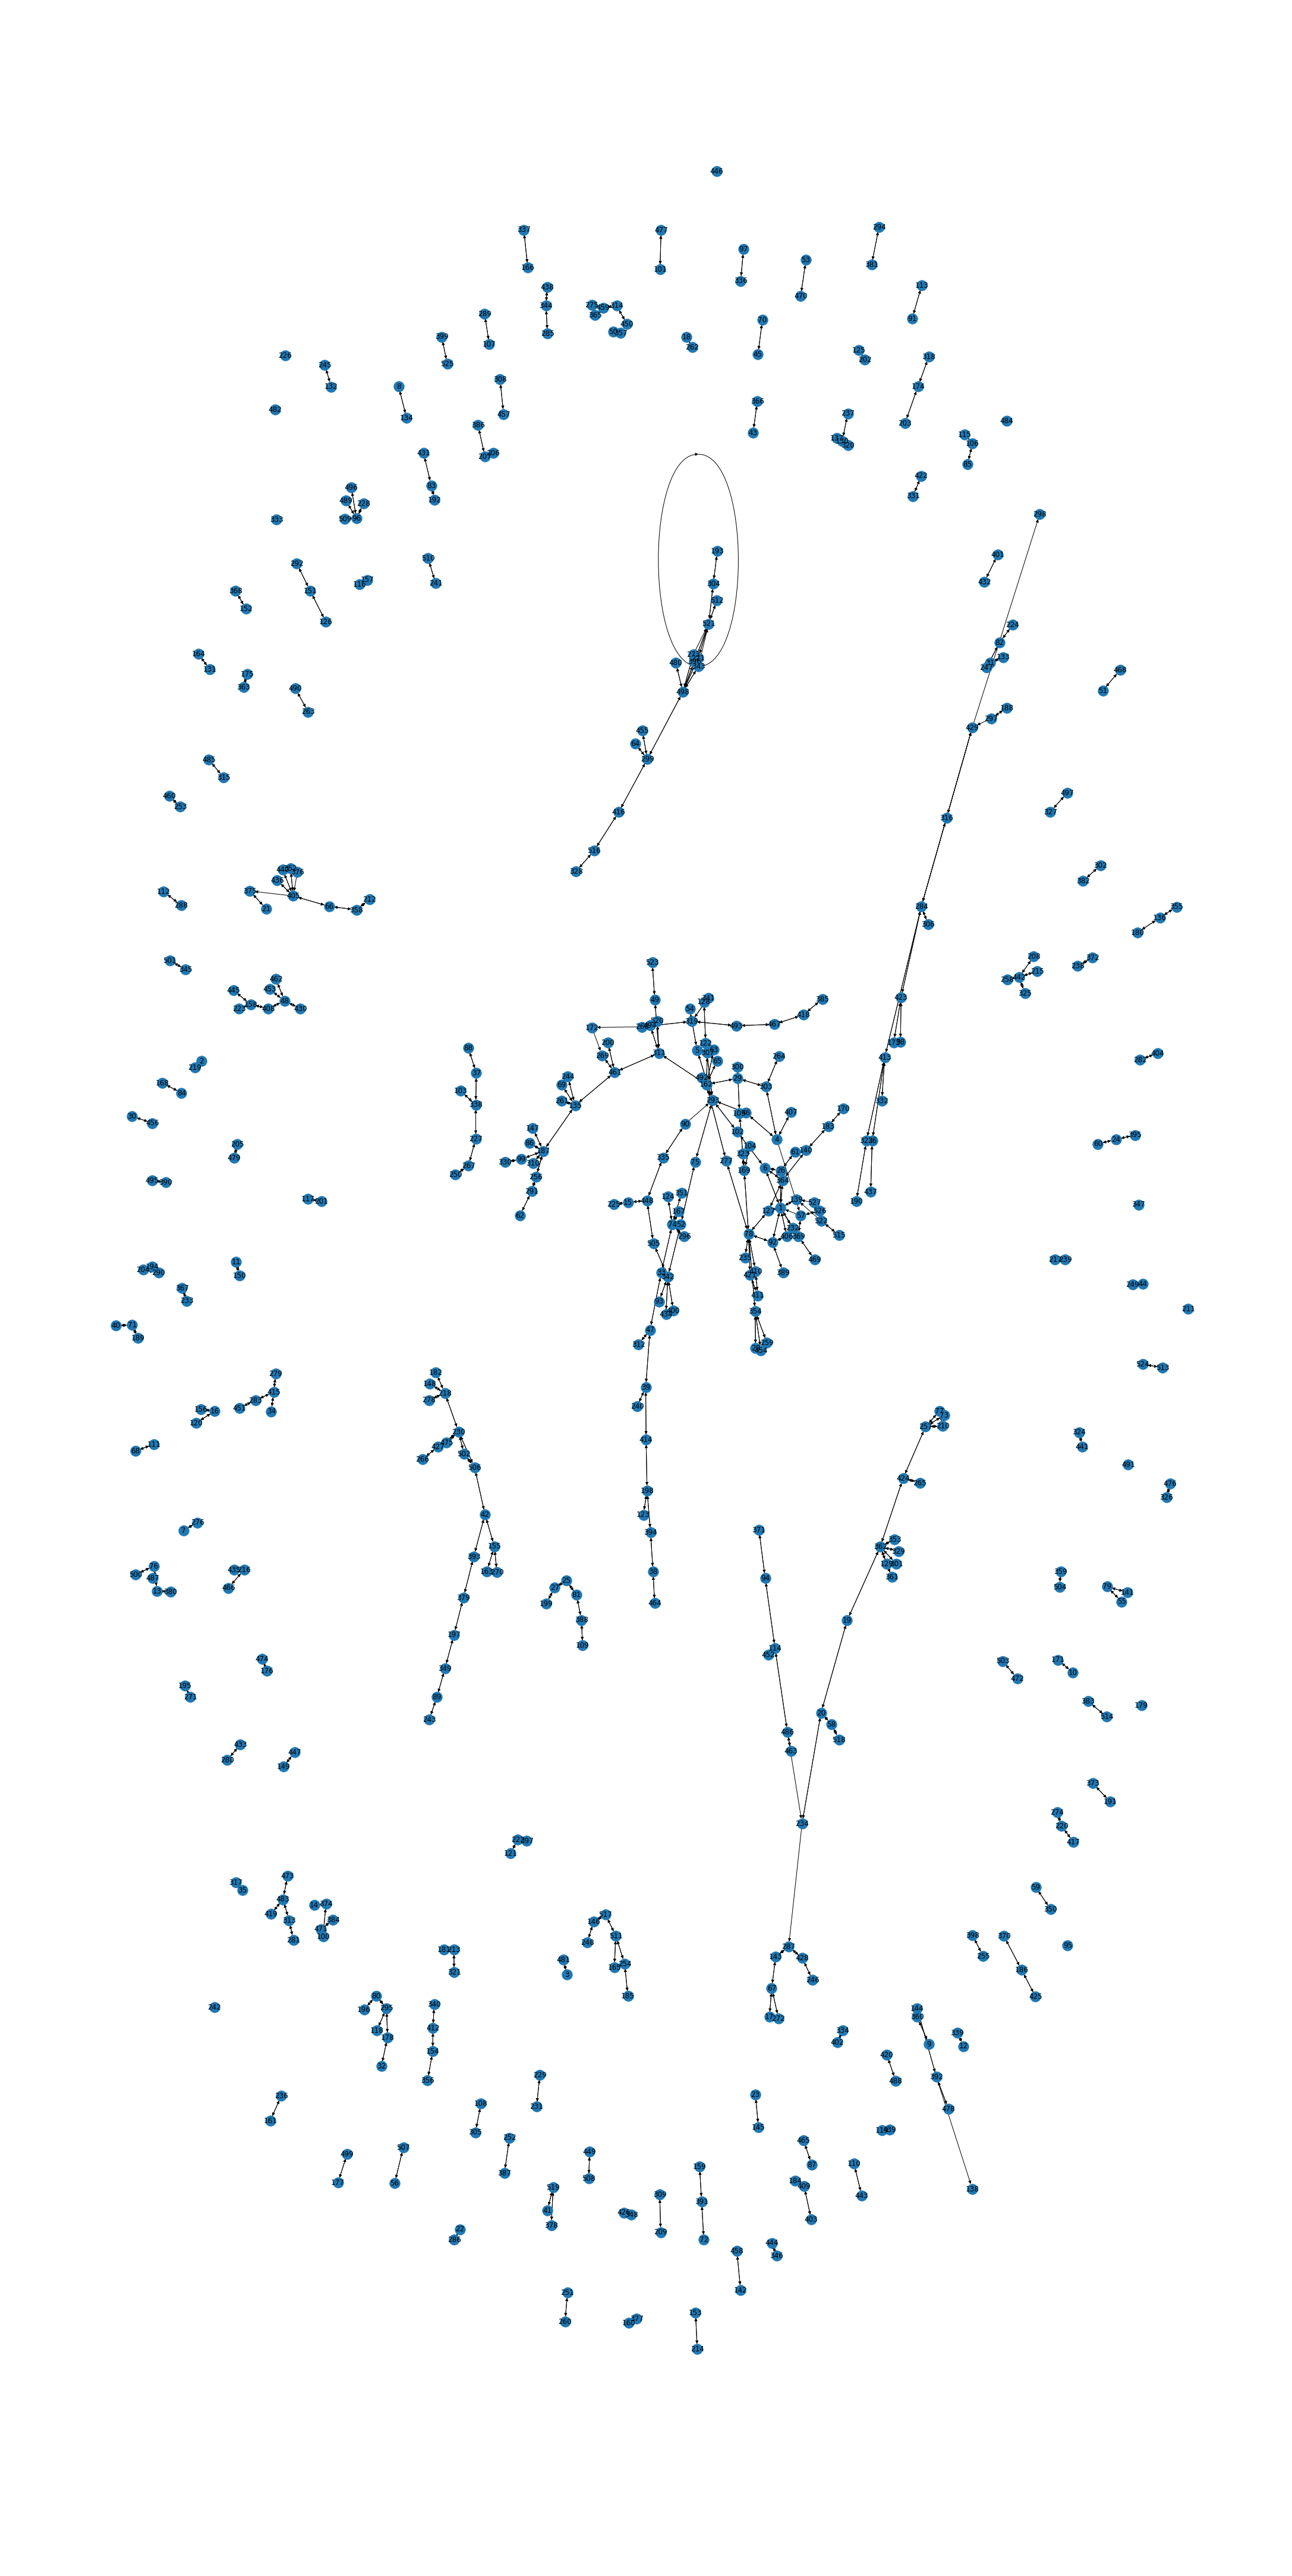

In [ ]:
plt.figure(figsize = (30,60))
random.seed(100)
my_pos = nx.spring_layout(G,seed=100)
nx.draw(G, pos = my_pos, with_labels=True)
plt.show()
#plt.savefig('books_read.png')

In [ ]:
nx.average_clustering(G)
#measures the probability of nodes in a graph to cluster together. Low = weak ties

0.04117495978264479

In [ ]:
G_Descend = sorted(nx.degree(G), key=lambda x:x[1], reverse=True)
top_ten_degree = G_Descend[:10]
top_ten_degree

#top 10 degree i.e. number of connections a node has

[(1, 19),
 (78, 16),
 (187, 14),
 (362, 14),
 (293, 13),
 (498, 13),
 (162, 12),
 (343, 11),
 (74, 10),
 (135, 10)]

In [ ]:
Centrality = nx.degree_centrality(G)
G_Descend_Centrality = sorted(Centrality.items(), key = lambda y:y[1], reverse = True)
top_ten_degree_centrality = pd.DataFrame(G_Descend_Centrality[:10],
                                               columns=["Nodes", "Degree"])
print(top_ten_degree_centrality)
#degree of centrality top ten

   Nodes    Degree
0      1  0.036122
1     78  0.030418
2    187  0.026616
3    362  0.026616
4    293  0.024715
5    498  0.024715
6    162  0.022814
7    343  0.020913
8     74  0.019011
9    135  0.019011


In [ ]:
Closeness = nx.closeness_centrality(G)
G_Descend_Closeness = sorted(Closeness.items(), key = lambda z:z[1], reverse = True)
Top_ten_Degree_Closeness = pd.DataFrame(G_Descend_Closeness[:10],columns=["Nodes", "Closeness"]) 
#Closeness top ten

In [ ]:
Betweenness = nx.betweenness_centrality(G)
G_Descend_Betweenness = sorted(Betweenness.items(), key = lambda a:a[1], reverse = True)
Top_ten_Degree_Betweenness = pd.DataFrame(G_Descend_Betweenness[:10], columns=["Nodes", "Betweenness"])
#Betweenness top ten

In [ ]:
Table = pd.merge(top_ten_degree_centrality, Top_ten_Degree_Closeness, on="Nodes", how = "outer")
Table = pd.merge(Table, Top_ten_Degree_Betweenness, on ="Nodes", how = "outer")

In [ ]:
#Find clusters in the graph
connected_components = list(nx.weakly_connected_components(G))

#Sort the clusters in the graph
sorted_components = sorted(connected_components, key=len, reverse=True)


In [ ]:
for i, component in enumerate(sorted_components[:5]):
    # Create a subgraph for the current connected component
    subgraph = G.subgraph(component)

    # Calculate the degree centrality for the subgraph
    centrality = nx.degree_centrality(subgraph)

    # Print the results
    print(f"Cluster {i + 1} (size: {len(component)}): {centrality}\n")

Cluster 1 (size: 94): {1: 0.20430107526881722, 515: 0.021505376344086023, 4: 0.07526881720430108, 5: 0.043010752688172046, 6: 0.08602150537634409, 520: 0.021505376344086023, 522: 0.043010752688172046, 523: 0.021505376344086023, 526: 0.021505376344086023, 527: 0.021505376344086023, 15: 0.043010752688172046, 26: 0.06451612903225806, 28: 0.043010752688172046, 29: 0.043010752688172046, 46: 0.043010752688172046, 49: 0.043010752688172046, 52: 0.043010752688172046, 54: 0.021505376344086023, 57: 0.06451612903225806, 61: 0.021505376344086023, 62: 0.021505376344086023, 63: 0.021505376344086023, 65: 0.021505376344086023, 69: 0.021505376344086023, 75: 0.043010752688172046, 78: 0.17204301075268819, 86: 0.021505376344086023, 90: 0.03225806451612903, 92: 0.08602150537634409, 93: 0.021505376344086023, 99: 0.043010752688172046, 102: 0.043010752688172046, 104: 0.021505376344086023, 105: 0.043010752688172046, 122: 0.043010752688172046, 127: 0.06451612903225806, 128: 0.021505376344086023, 135: 0.107526881

In [ ]:
# Initialize an empty list to store the results
results = []

for i, component in enumerate(sorted_components[:5]):
    # Create a subgraph for the current connected component
    subgraph = G.subgraph(component)

    # Calculate the centrality measures for the subgraph
    degree_centrality = nx.degree_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)

    # Combine the results into a single dictionary
    for node in component:
        results.append({
            'Cluster': i + 1,
            'Node': node,
            'Degree Centrality': degree_centrality[node],
            'Betweenness Centrality': betweenness_centrality[node],
            'Closeness Centrality': closeness_centrality[node],
        })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by Cluster, Degree Centrality, Betweenness Centrality, and Closeness Centrality
sorted_df = results_df.sort_values(
    by=['Cluster', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality'],
    ascending=[True, False, False, False]
)

# Display the top 10 nodes for each cluster
for i in range(1, 6):
    print(f"Top 10 nodes for Cluster {i}:")
    print(sorted_df[sorted_df['Cluster'] == i].head(10))
    print('\n')


Top 10 nodes for Cluster 1:
    Cluster  Node  Degree Centrality  Betweenness Centrality  \
0         1     1           0.204301                0.219768   
25        1    78           0.172043                0.381029   
46        1   187           0.150538                0.154278   
60        1   293           0.139785                0.310747   
41        1   162           0.129032                0.428656   
65        1   311           0.107527                0.374708   
37        1   135           0.107527                0.218794   
71        1   342           0.107527                0.123831   
74        1   369           0.107527                0.028674   
87        1   461           0.086022                0.322230   

    Closeness Centrality  
0               0.195378  
25              0.203947  
46              0.136966  
60              0.168478  
41              0.205298  
65              0.190184  
37              0.154229  
71              0.118622  
74              0.167266